In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

/Users/bohdan/.pyenv/versions/phd-indoor/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if torch.backends.mps.is_available():
    DEVICE = 'mps'  # macbook
elif torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'

f'using {DEVICE} device'

'using mps device'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

batch_size = 128

import functools
cifar10 = functools.partial(
    torchvision.datasets.CIFAR10,
    root='./data', download=True, transform=transform,
)
loader = functools.partial(torch.utils.data.DataLoader,
    batch_size=batch_size, shuffle=True, num_workers=2,
)


train_val_data = cifar10(train=True)
train_data, val_data = torch.utils.data.random_split(train_val_data, [0.8, 0.2])
train_loader = loader(train_data)
val_loader = loader(val_data)

test_data = cifar10(train=False)
test_loader = loader(test_data)


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


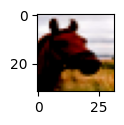

In [5]:
import matplotlib.pyplot as plt

sample_image, _ = test_data[99]
plt.figure(figsize = (1, 1))
plt.imshow(sample_image.permute(1, 2, 0))

In [8]:
from models import Autoencoder
from models import VariationalAutoencoder

EXPERIMENT_NAME = 'ref-vae-1'

ae = VariationalAutoencoder(EXPERIMENT_NAME).to(DEVICE)

ae.train_loop((train_loader, val_loader), sample_image, 100)


VariationalAutoencoder<ref-vae-1> now uses /Users/bohdan/Edu/ucu/genai/CV/genai_image_generation for resources.
Epoch  51/100


100%|██████████| 313/313 [01:59<00:00,  2.61it/s]


Train loss: 0.2046564801242024


100%|██████████| 79/79 [00:23<00:00,  3.33it/s]


Validation loss: 0.20478649022458476
Epoch  52/100


100%|██████████| 313/313 [02:00<00:00,  2.61it/s]


Train loss: 0.20468243832786243


100%|██████████| 79/79 [00:22<00:00,  3.45it/s]


Validation loss: 0.2044585001996801
Epoch  53/100


100%|██████████| 313/313 [02:00<00:00,  2.61it/s]


Train loss: 0.204584018252909


100%|██████████| 79/79 [00:23<00:00,  3.35it/s]


Validation loss: 0.20416332007963447
Epoch  54/100


100%|██████████| 313/313 [02:01<00:00,  2.59it/s]


Train loss: 0.20446765203826345


100%|██████████| 79/79 [00:23<00:00,  3.32it/s]


Validation loss: 0.2037210141933417
Epoch  55/100


100%|██████████| 313/313 [02:01<00:00,  2.58it/s]


Train loss: 0.2043221753816635


100%|██████████| 79/79 [00:23<00:00,  3.34it/s]


Validation loss: 0.20403326783753647
Epoch  56/100


100%|██████████| 313/313 [02:01<00:00,  2.59it/s]


Train loss: 0.20420528457949336


100%|██████████| 79/79 [00:22<00:00,  3.44it/s]


Validation loss: 0.20355595440804203
Epoch  57/100


100%|██████████| 313/313 [02:00<00:00,  2.60it/s]


Train loss: 0.20403664785261733


100%|██████████| 79/79 [00:23<00:00,  3.33it/s]


Validation loss: 0.20415343193313742
Epoch  58/100


100%|██████████| 313/313 [02:01<00:00,  2.58it/s]


Train loss: 0.2040523425363504


100%|██████████| 79/79 [00:23<00:00,  3.32it/s]


Validation loss: 0.20393676112724257
Epoch  59/100


100%|██████████| 313/313 [02:01<00:00,  2.58it/s]


Train loss: 0.2040374586090874


100%|██████████| 79/79 [00:22<00:00,  3.44it/s]


Validation loss: 0.20398082404951506
Epoch  60/100


100%|██████████| 313/313 [02:01<00:00,  2.57it/s]


Train loss: 0.20385814765200447


100%|██████████| 79/79 [00:23<00:00,  3.34it/s]


Validation loss: 0.20336712293232542
Epoch  61/100


100%|██████████| 313/313 [02:00<00:00,  2.59it/s]


Train loss: 0.20377500226703316


100%|██████████| 79/79 [00:24<00:00,  3.26it/s]


Validation loss: 0.20334658215317544
Epoch  62/100


100%|██████████| 313/313 [02:00<00:00,  2.59it/s]


Train loss: 0.2037402779911273


100%|██████████| 79/79 [00:23<00:00,  3.34it/s]


Validation loss: 0.20391776893712296
Epoch  63/100


100%|██████████| 313/313 [02:00<00:00,  2.61it/s]


Train loss: 0.2035951813855491


100%|██████████| 79/79 [00:23<00:00,  3.33it/s]


Validation loss: 0.2033484408372565
Epoch  64/100


  8%|▊         | 24/313 [00:22<04:36,  1.04it/s]


KeyboardInterrupt: 